In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
print(np.__version__)

1.26.4


In [3]:
print(pd.__version__)

2.2.2


In [5]:
import eeg_dataloader

In [6]:
x_trainB, y_trainB, x_valB, y_valB= eeg_dataloader.Binary_Classification_Restructure()

In [7]:
print(x_trainB.shape, y_trainB.shape, x_valB.shape, y_valB.shape)

(10865, 178) (10865,) (3000, 178) (3000,)


In [35]:
models = []
accuracies = []

models_s = []
accuracies_s = []

In [36]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter = 3000),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, clf in classifiers.items():
    models.append(clf)
    clf.fit(x_trainB, y_trainB)
    predictions = clf.predict(x_valB)
    accuracy = accuracy_score(y_valB, predictions)
    accuracies.append(accuracy)
    print(f"{clf}")
    print(f"{accuracy*100:.4f}%")
    print(".............................................")

LogisticRegression(max_iter=3000)
70.8333%
.............................................
DecisionTreeClassifier()
90.8333%
.............................................
GaussianNB()
95.8000%
.............................................


In [37]:
# Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_trainS = scaler.fit_transform(x_trainB)
x_valS = scaler.transform(x_valB)

In [38]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter = 3000),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, clf in classifiers.items():
    models_s.append(clf)
    clf.fit(x_trainS, y_trainB)
    predictions = clf.predict(x_valS)
    accuracy = accuracy_score(y_valB, predictions)
    accuracies_s.append(accuracy)
    print(f"{clf}")
    print(f"{accuracy*100:.4f}%")
    print(".............................................")

LogisticRegression(max_iter=3000)
73.1333%
.............................................
DecisionTreeClassifier()
90.7667%
.............................................
GaussianNB()
95.8000%
.............................................


In [39]:
# AdaBoost

In [40]:
# Adaboost - Decision Tree

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
models.append("AdaBoost_DT")
base_clf_dt = DecisionTreeClassifier(max_depth = 10)
adaboost_dt = AdaBoostClassifier(estimator=base_clf_dt, learning_rate=0.7, random_state=5)
adaboost_dt.fit(x_trainB, y_trainB)

predictions_dt = adaboost_dt.predict(x_valB)

accuracy_dt = accuracy_score(y_valB, predictions_dt)
print(f"Accuracy = {accuracy_dt*100:.4f}%") 
accuracies.append(accuracy_dt)

C:\Users\mcss\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy = 96.0000%


In [43]:
base_clf_dt_s = DecisionTreeClassifier(max_depth = 10)
adaboost_dt_s = AdaBoostClassifier(estimator=base_clf_dt_s, learning_rate=0.7, random_state=1)
adaboost_dt_s.fit(x_trainS, y_trainB)

predictions_dt_s = adaboost_dt_s.predict(x_valS)

accuracy_dt_s = accuracy_score(y_valB, predictions_dt_s)
print(f"Accuracy = {accuracy_dt*100:.4f}%")
accuracies_s.append(accuracy_dt_s)

C:\Users\mcss\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy = 96.0000%


In [44]:
# Ada Boost - Naive Bayes

In [45]:
models.append("AdaBoost_NB")
base_clf_nb = GaussianNB()
adaboost_nb = AdaBoostClassifier(estimator=base_clf_nb, n_estimators=1000, random_state=3)
adaboost_nb.fit(x_trainB, y_trainB)

predictions_nb = adaboost_nb.predict(x_valB)

accuracy_nb = accuracy_score(y_valB, predictions_nb)
print(f"Accuracy = {accuracy_nb*100:.4f}%")

accuracies.append(accuracy_nb)

C:\Users\mcss\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy = 93.9667%


In [46]:
base_clf_nb_s = GaussianNB()
adaboost_nb_s = AdaBoostClassifier(estimator=base_clf_nb_s, n_estimators=1000, random_state=4)
adaboost_nb_s.fit(x_trainS, y_trainB)

predictions_nb_s = adaboost_nb_s.predict(x_valS)

accuracy_nb_s = accuracy_score(y_valB, predictions_nb_s)
print(f"Accuracy = {accuracy_nb*100:.4f}%")

accuracies_s.append(accuracy_nb_s)

C:\Users\mcss\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy = 93.9667%


In [47]:
# Neural Network

In [48]:
import random

In [49]:
class Network():
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.weights = [np.random.randn(y, x) for y, x in zip(sizes[1:], sizes[:-1])]
        self.biases = [np.random.randn(x, 1) for x in sizes[1: ]]

    def SGD(self, training_data, n_epochs, mini_batch_size, learning_rate, test_data):
        n = len(training_data)
        for i in range(n_epochs):
            random.shuffle(training_data)
            mini_batches = [training_data[k:k+mini_batch_size] for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_w_b(mini_batch, learning_rate)
            print(f"epoch{i} : {self.accuracy(test_data):.4f}")

    def update_w_b(self, mini_batch, learning_rate):
        gradsum_w = [np.zeros((w.shape)) for w in self.weights]
        gradsum_b = [np.zeros((b.shape)) for b in self.biases]

        for x, y in mini_batch:
            grad_w, grad_b = self.backprop(x, y)
            gradsum_w = [gsw + gw for gsw, gw in zip(gradsum_w, grad_w)]
            gradsum_b = [gsb + gb for gsb, gb in zip(gradsum_b, grad_b)]

        self.weights = [w - (learning_rate/len(mini_batch))*gsw for w, gsw in zip(self.weights, gradsum_w)]
        self.biases = [b - (learning_rate/len(mini_batch))*gsb for b, gsb in zip(self.biases, gradsum_b)]

    def backprop(self, x, y):
        grad_w = [np.zeros(w.shape) for w in self.weights]
        grad_b = [np.zeros(b.shape) for b in self.biases]

        activation = x
        activations = [x]
        z_layer = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activation) + b
            z_layer.append(z)
            activation = sigmoid(z)
            activations.append(activation)

        delta = self.cost_derivative(activations[-1], y)*sigmoid_prime(z_layer[-1])
        grad_w[-1] = np.dot(delta, activations[-2].T)
        grad_b[-1] = delta

        for l in range(2, self.num_layers):
            z = z_list[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].T, delta)*sp
            grad_w[-l] = np.dot(delta, activations[-l-1].T)
            grad_b[-l] = delta

        return (grad_w, grad_b)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)
    
    def feedforward(self, a):
        for w, b in zip(self.weights, self.biases):
            activations = sigmoid(np.dot(w, a) + b)
        return activations
        
    def accuracy(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y) for x, y in test_data]
        n_test = len(test_data)
        total = sum(int(x==y) for (x, y) in test_results)
        return (total/n_test)*100           

def sigmoid(z):
    return 1.0/(1.0 + np.exp(z))

def sigmoid_prime(z):
    return sigmoid(z)*(1.0 - sigmoid(z))

In [50]:
training_data, testing_data = eeg_dataloader.Binary_Clf_NN()

In [51]:
net = Network([178, 2])
net.SGD(training_data, n_epochs=30, mini_batch_size=10, learning_rate=0.001, test_data=testing_data)

C:\Users\mcss\AppData\Local\Temp\ipykernel_8436\1383488581.py:70: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(z))


epoch0 : 58.5333
epoch1 : 58.6000
epoch2 : 58.6333
epoch3 : 58.6000
epoch4 : 58.5000
epoch5 : 58.6667
epoch6 : 58.5333
epoch7 : 58.5667
epoch8 : 58.5667
epoch9 : 58.6333
epoch10 : 58.5667
epoch11 : 58.5667
epoch12 : 58.6000
epoch13 : 58.6000
epoch14 : 58.5333
epoch15 : 58.6000
epoch16 : 58.4333
epoch17 : 58.3667
epoch18 : 58.4000
epoch19 : 58.6333
epoch20 : 58.5000
epoch21 : 58.5333
epoch22 : 58.4333
epoch23 : 58.5000
epoch24 : 58.4667
epoch25 : 58.4000
epoch26 : 58.4000
epoch27 : 58.4667
epoch28 : 58.4333
epoch29 : 58.4667


In [52]:
training_dataS, testing_dataS = eeg_dataloader.Binary_NN_scaled()

In [53]:
net = Network([178, 2])
net.SGD(training_dataS, n_epochs=30, mini_batch_size=10, learning_rate=10.0, test_data=testing_dataS)

epoch0 : 85.0333
epoch1 : 85.0667
epoch2 : 84.8667
epoch3 : 84.8000
epoch4 : 84.3000


C:\Users\mcss\AppData\Local\Temp\ipykernel_8436\1383488581.py:70: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(z))


epoch5 : 84.3333
epoch6 : 84.7333
epoch7 : 84.1000
epoch8 : 84.4333
epoch9 : 84.3000
epoch10 : 84.4333
epoch11 : 84.4000
epoch12 : 84.3667
epoch13 : 84.0333
epoch14 : 84.2667
epoch15 : 84.0333
epoch16 : 84.5667
epoch17 : 84.4333
epoch18 : 84.4333
epoch19 : 84.8000
epoch20 : 84.5000
epoch21 : 84.0000
epoch22 : 83.8667
epoch23 : 84.0333
epoch24 : 83.9667
epoch25 : 84.0333
epoch26 : 84.0333
epoch27 : 83.9333
epoch28 : 84.3000
epoch29 : 84.0667


In [54]:
models.append("Neural Network")
accuracies.append((56.9+54.1333)/200)
accuracies_s.append((85.1667+83.7333)/200)

In [55]:
print(models)
print(accuracies)
print(accuracies_s)


[LogisticRegression(max_iter=3000), DecisionTreeClassifier(), GaussianNB(), 'AdaBoost_DT', 'AdaBoost_NB', 'Neural Network']
[0.7083333333333334, 0.9083333333333333, 0.958, 0.96, 0.9396666666666667, 0.5551665]
[0.7313333333333333, 0.9076666666666666, 0.958, 0.9633333333333334, 0.9436666666666667, 0.8445]


In [ ]:
models.remove("Neural Network")
accuracies.remove()
accuracies_s.remove()

In [56]:
model_evaluation = {
    "MODEL":models,
    "ACCURACY":accuracies,
    "ACCURACY_S":accuracies_s
}

evaluation_table = pd.DataFrame(model_evaluation)
eval_table_styled = evaluation_table.style.set_properties(**{"max_width":"200px"})
eval_table_styled

,MODEL,ACCURACY,ACCURACY_S
0,LogisticRegression(max_iter=3000),0.708333,0.731333
1,DecisionTreeClassifier(),0.908333,0.907667
2,GaussianNB(),0.958000,0.958000
3,AdaBoost_DT,0.960000,0.963333
4,AdaBoost_NB,0.939667,0.943667
5,Neural Network,0.555167,0.844500


In [57]:
import matplotlib.pyplot as plt

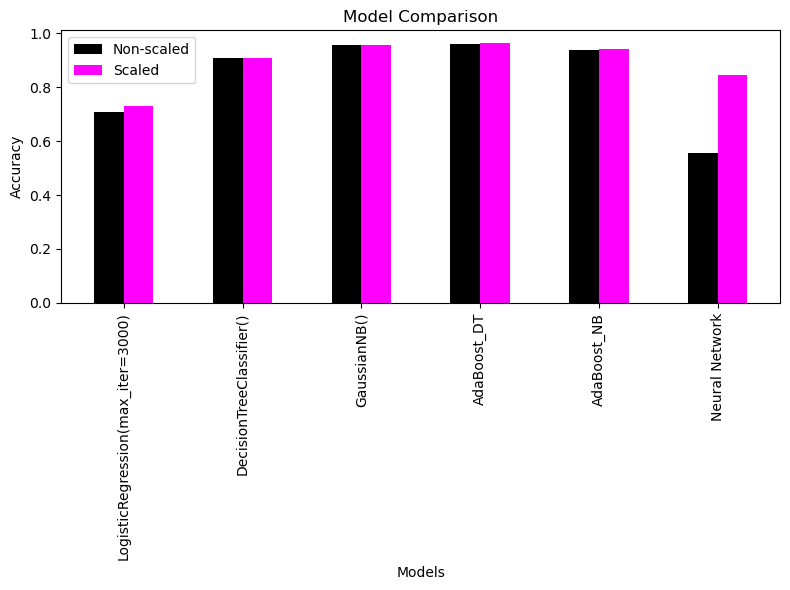

In [75]:
bar_width=0.25
num_models=len(models)
index = np.arange(num_models)

plt.figure(figsize=(8, 6))
plt.bar(index-bar_width/2, accuracies, bar_width, label="Non-scaled", color="black")
plt.bar(index+bar_width/2, accuracies_s, bar_width, label="Scaled", color="magenta")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(index, models, rotation=90)
plt.title("Model Comparison")
plt.legend()
plt.tight_layout()

In [59]:
x_test, y_test = eeg_dataloader.testing()

In [60]:
predictions_dt_s = adaboost_dt_s.predict(x_test)

accuracy_dt_s = accuracy_score(y_test, predictions_dt_s)
print(f"Accuracy = {accuracy_dt*100:.4f}%")

Accuracy = 96.0000%
